In [0]:
import sklearn
import numpy as np
from keras.layers import Dense
from keras import Sequential
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
bcdata = load_breast_cancer()
#print(bcdata.data.shape)

#bcdata.target[:40]

my_ones = bcdata.data[bcdata.target==1,:]
my_zeros = bcdata.data[bcdata.target==0,:]
train=np.concatenate((my_ones[:10],my_zeros[:10]), axis=0)
target=np.ones(20)
target[10:]=0

Text(0, 0.5, 'Average Loss')

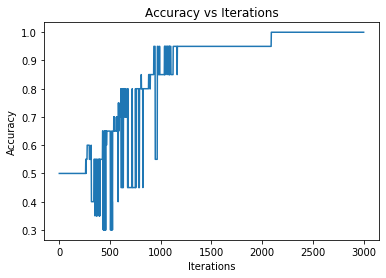

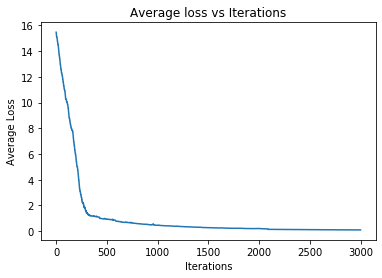

In [55]:
D = 200 # width of the hidden layer
iterations = 3000 # Number of iterations
lr = 0.001 # learning rate

# Initialize weights and biases
w1 = np.random.normal(size=(30, D))
b1 = np.random.normal(size=(D, 1))

w2 = np.random.normal(size=(D, 1))
b2 = np.random.normal(size=(1, 1))

# Randomly select sample indices to train with
train_samples = np.random.randint(low=0, high=20, size=(iterations,))
# print(train_samples)

# Compute accuracy before training
Z1 = np.matmul(train,w1) + np.transpose(b1)
A1 = np.tanh(Z1)
Z2 = np.matmul(A1,w2) + np.transpose(b2)
Y = 1/(1+np.exp(-Z2))
Y = Y.flatten()
Y_pred = 1*(Y>0.5)
Y_pred = Y_pred.flatten()
equ = 1*(Y_pred==target)
acc = np.sum(equ)/equ.shape[0]
# Compute Average Loss of Network
avg_loss = -(target*np.log(Y)+(1-target)*np.log(1-Y))
avg_loss = np.mean(avg_loss)

acc_all = [acc]
loss_all = [avg_loss]

for i in train_samples:
  # Forward propagation
  x = train[i, :]
  x = x.reshape((30, 1))

  z1 = np.matmul(np.transpose(w1),x) + b1
  a1 = np.tanh(z1)

  z2 = np.matmul(np.transpose(w2),a1) + b2
  y = 1/(1+np.exp(-z2))

  # Loss computation
  yt = target[i]
  J = -(yt*np.log(y)+(1-yt)*np.log(1-y))

  # Backpropagation
  G = -(yt*1/y+(1-yt)*1/(y-1)) # del_y
  G = G * y*(1-y) # del_z2
  del_b2 = G
  del_w2 = a1*G 
  G = w2*G #del_a1
  G = G * (1-a1**2)
  del_w1 = np.matmul(x, np.transpose(G))
  del_b1 = G 

  # Parameter update
  w1 = w1-lr*del_w1
  w2 = w2-lr*del_w2
  b1 = b1-lr*del_b1
  b2 = b2-lr*del_b2

  # Compute accuracy
  Z1 = np.matmul(train,w1) + np.transpose(b1)
  A1 = np.tanh(Z1)
  Z2 = np.matmul(A1,w2) + np.transpose(b2)
  Y = 1/(1+np.exp(-Z2))
  Y = Y.flatten()
  Y_pred = 1*(Y>0.5)
  Y_pred = Y_pred.flatten()
  equ = 1*(Y_pred==target)
  acc = np.sum(equ)/equ.shape[0]
  acc_all.append(acc)

  # Compute Average Loss of Network
  avg_loss = -(target*np.log(Y)+(1-target)*np.log(1-Y))
  avg_loss = np.mean(avg_loss)
  loss_all.append(avg_loss)

# Plot accuracy vs iterations
plt.figure()
plt.plot(acc_all)
plt.title('Accuracy vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

# Plot average loss vs iterations
plt.figure()
plt.plot(loss_all)
plt.title('Average loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Average Loss')